In [1]:
import numpy as np
from astropy.cosmology import LambdaCDM
import matplotlib.pyplot as plt
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from Cosmo212.mcmc_helper_jla import *

In [3]:
dir_path='Datasets/JLA Data/jla_likelihood_v6/data/'
fname_cov='jla_mub_covmatrix.dat'
fname_mub='jla_mub.txt'

covdat=np.loadtxt(dir_path+fname_cov, skiprows=1).reshape(31, 31)
mumat=np.loadtxt(dir_path+fname_mub, skiprows=1, delimiter=' ')

In [4]:
#Fixed h likelihoods
cov_inv=np.linalg.inv(covdat)
z_arr, mu_obs=mumat[:, 0], mumat[:, 1]

def rlist_to_csv(list_obj, cnames, fname): #saving a list of rows to a csv file
    df = pd.DataFrame(list_obj)
    print(df.head())
    df.columns = cnames #["Session", "Channel", "Cluster", "p Value", "RSeq Time Window"]
    #df.to_csv(fname)
    return df 

In [5]:
z_arr

array([0.01 , 0.012, 0.014, 0.016, 0.019, 0.023, 0.026, 0.031, 0.037,
       0.043, 0.051, 0.06 , 0.07 , 0.082, 0.097, 0.114, 0.134, 0.158,
       0.186, 0.218, 0.257, 0.302, 0.355, 0.418, 0.491, 0.578, 0.679,
       0.799, 0.94 , 1.105, 1.3  ])

In [4]:
#Fixed h likelihoods
cov_inv=np.linalg.inv(covdat)
z_arr, mu_obs=mumat[:, 0], mumat[:, 1]


om_range=np.arange(0.2, 0.7, 0.05)
h=0.73
llist=[]
for om_m in om_range:
    lik=ln_likelihood_2d(mu_obs, cov_inv, z_arr, [om_m, h])
    print (om_m, h, ': ', lik)
    llist.append([om_m, h, lik])
            
likdf=rlist_to_csv(llist, ['Om_m', 'h', 'Ln Lik'], "..")
print ('Usual BF: ', ln_likelihood_2d(mu_obs, cov_inv, z_arr, [0.29, 0.73]))

0.2 0.73 :  -24.560339135110794
0.25 0.73 :  -25.449087231999883
0.3 0.73 :  -30.65481888932448
0.35 0.73 :  -39.38725709171676
0.39999999999999997 0.73 :  -51.0488003756413
0.44999999999999996 0.73 :  -65.17463825922725
0.49999999999999994 0.73 :  -81.39515411904368
0.5499999999999999 0.73 :  -99.41113024115339
0.5999999999999999 0.73 :  -118.97674117634516
0.6499999999999999 0.73 :  -139.8875092737427
      0     1          2
0  0.20  0.73 -24.560339
1  0.25  0.73 -25.449087
2  0.30  0.73 -30.654819
3  0.35  0.73 -39.387257
4  0.40  0.73 -51.048800
Usual BF:  -29.309505130606706


In [13]:
from Cosmo212.jla_mcmc_binned import*
dfdat, covmat=data_load()
cosmo=FlatLambdaCDM(Om0=0.29, H0=100*0.70)
dfdat['mu_exp']=cosmo.distmod(dfdat['z'].values).value
dfdat

,z,mu,mu_exp
0,0.010,32.953887,33.175481
1,0.012,33.879003,33.574732
2,0.014,33.842141,33.912800
3,0.016,34.118567,34.206084
4,0.019,34.593446,34.584221
5,0.023,34.939027,35.005684
6,0.026,35.252096,35.276830
7,0.031,35.748502,35.666922
8,0.037,36.069788,36.060825
9,0.043,36.434570,36.396778


In [14]:
mu_exp=dfdat['mu_exp'].values
mu_act=dfdat['mu'].values

r=(mu_act-mu_exp).reshape(-1, 1)
-np.matmul(r.T, np.matmul(cov_inv, r))/2 #looks like the 33 chi2 thing that you remember from somewhere
print (max(r), max(np.matmul(cov_inv, r)), max(np.matmul(r.T, np.matmul(cov_inv, r))))
ln_likelihood_2d(mu_act, cov_inv, mumat[:, 0], [0.29, 0.70])

[0.3042719] [64.6845284] [33.69824454]


-16.849122270459738

In [15]:
om_range=np.arange(0.2, 0.7, 0.02)
h_range=np.arange(0.4, 0.8, 0.02)
llist=[]
for om_m in om_range:
    for h in h_range:
        lik=ln_likelihood_2d(mu_act, cov_inv, mumat[:, 0], [om_m, h])
        #print (om_m, h, ': ', lik)
        llist.append([om_m, h, lik])
            
likdf=rlist_to_csv(llist, ['Om_m', 'h', 'Ln Lik'], "..")
print ('Usual BF: ', ln_likelihood_2d(mu_obs, cov_inv, z_arr, [0.29, 0.73]))
likdf[likdf['Ln Lik']==likdf['Ln Lik'].max()]

     0     1            2
0  0.2  0.40 -2659.180798
1  0.2  0.42 -2235.057504
2  0.2  0.44 -1865.264408
3  0.2  0.46 -1543.465449
4  0.2  0.48 -1264.259343
Usual BF:  -29.309505130606706


,Om_m,h,Ln Lik
115,0.3,0.7,-16.823628


In [27]:
#Confidence Ellipses sig level
import numpy as np
from scipy.stats import norm, chi2

def cov_ellipse(cov, q=None, nsig=None, **kwargs):
    """
    Parameters
    ----------
    cov : (2, 2) array
        Covariance matrix.
    q : float, optional
        Confidence level, should be in (0, 1)
    nsig : int, optional
        Confidence level in unit of standard deviations. 
        E.g. 1 stands for 68.3% and 2 stands for 95.4%.

    Returns
    -------
    width, height, rotation :
         The lengths of two axises and the rotation angle in degree
    for the ellipse.
    """

    if q is not None:
        q = np.asarray(q)
    elif nsig is not None:
        q = 2 * norm.cdf(nsig) - 1
    else:
        raise ValueError('One of `q` and `nsig` should be specified.')
    r2 = chi2.ppf(q, 2)

    val, vec = np.linalg.eigh(cov)
    width, height = 2 * np.sqrt(val[:, None] * r2)
    rotation = np.degrees(np.arctan2(*vec[::-1, 0]))

    return width, height, rotation

In [28]:
chains=np.loadtxt('Cosmo212/Results_JLA/Main1/chfinal_0.txt')[int(0.1*200000):, :]
covar=np.cov(chains.T)

In [33]:
from matplotlib.patches import Ellipse

def plot_confidence_ellipses_CL(mat, bool_save, dir_save, choice):
    if choice=='FL2':
        params = ['Omega_m', 'h']
        print (params)
        fig, ax = plt.subplots()
        sigcolors=[[0.683, 'red', '-'], [0.954, 'green', '--'], [0.997, 'black', ':']]
        ax.scatter(x=mat[:, 0], y=mat[:, 1], s=0.25, color='blue')
        covar=np.cov(mat.T)
        for scomb in sigcolors:
            w, h, r=cov_ellipse(covar, scomb[0])
            ellipse = Ellipse((np.mean(mat[:, 0]), np.mean(mat[:, 1])), width=w, height=h, angle=r, edgecolor=scomb[1], linestyle=scomb[2], fill=False)
            ax.add_patch(ellipse)
        ax.set_xlabel(params[0])
        ax.set_ylabel(params[1])
        fig.suptitle('Confidence Ellipses')
        if bool_save:
            plt.savefig(dir_save)
        plt.show()
    return

['Omega_m', 'h']


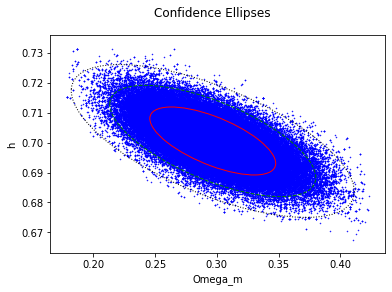

In [ ]:
om_range=np.arange(0.2, 0.7, 0.02)
h_range=np.arange(0.4, 0.8, 0.02)
llist=[]
for om_m in om_range:
    for h in h_range:
        lik=ln_likelihood_2d(mu_act, cov_inv, mumat[:, 0], [om_m, h])
        #print (om_m, h, ': ', lik)
        llist.append([om_m, h, lik])
            
likdf=rlist_to_csv(llist, ['Om_m', 'h', 'Ln Lik'], "..")
print ('Usual BF: ', ln_likelihood_2d(mu_obs, cov_inv, z_arr, [0.29, 0.73]))
likdf[likdf['Ln Lik']==likdf['Ln Lik'].max()]

In [44]:
matlist=[np.array([1, 2, 3, 4]), np.array([1.5, 2.2, 2.4, 1.9])]

N, D, M=4, 1, 2
print (N, D, M)

ch_mean_list =[np.mean(mat, axis=0) for mat in matlist]         #mean of each chain
sm_list=[(np.var(mat, axis=0)*N / (N-1)) for mat in matlist]    #var of each chain
w_list= np.sum(np.array(sm_list), axis=0)/M                     #avg within chain variance, Needs to be adding across chains, not params--check!, shape=D
all_mean=np.mean(np.array(ch_mean_list), axis=0)                #mean of means of all chains, Needs to be adding across chains, not params--check!
diff=np.array(ch_mean_list) - all_mean                          #mean of each chain - mean of all

b_list=np.sum(np.power(diff, 2), axis=0)*N/(M-1) #shape=D       #variance of within chain means
var_est=w_list*(N-1)/N + b_list/N #shape=D                      #v^
r_hat=np.sqrt(var_est/w_list) #shape=D

print ('Diff', diff, diff.shape)
print ('Checks', ch_mean_list[0].shape, sm_list[0].shape, w_list.shape, all_mean.shape, b_list.shape, var_est.shape, r_hat.shape)
print('Checks per chain: ', ch_mean_list, sm_list)
print ('Avg across chains: W', w_list, all_mean)
print ('B, V^, R^: ', b_list, var_est, r_hat)
print (r_hat)

4 1 2
Diff [ 0.25 -0.25] (2,)
Checks () () () () () () ()
Checks per chain:  [2.5, 2.0] [1.6666666666666667, 0.15333333333333335]
Avg across chains: W 0.91 2.25
B, V^, R^:  0.5 0.8075 0.9419992767314831
0.9419992767314831


In [40]:
sm

1.82

In [8]:
df_full=pd.read_csv('Datasets/JLA Data/jla_likelihood_v6/data/jla_lcparams.txt', delim_whitespace=True)

In [12]:
print (df_full['zcmb'].min(), df_full['zcmb'].max(), len(df_full.index))

0.01006 1.2991059999999999 740
